In [1]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib
import numpy as np

In [2]:
max_interval_time=timedelta(minutes=70)
min_interval_time=timedelta(seconds=0)
##Read origin data
df=pd.read_pickle('data/0to22data.pkl',)

In [3]:
df

,time,user,item
380964,2010-06-24 12:22:10,00101111100110100011000001011101,铁血军事-100306-太平洋战场.mp4
6643244,2010-07-09 12:34:35,00101111100110100011000001011101,父辈的旗帜(高清).mp4
6643432,2010-07-09 12:35:34,00101111100110100011000001011101,荣耀三九年.mp4
6662598,2010-07-09 14:12:05,00101111100110100011000001011101,父辈的旗帜(高清).mp4
14633928,2010-07-15 12:31:22,00101111100110100011000001011101,硫磺岛来信(高清).mp4
...,...,...,...
7152667,2010-07-09 17:03:10,11011110111110011111001000010001,星际迷航11DVD.mp4
7152678,2010-07-09 17:03:13,11011110111110011111001000010001,星际迷航10：复仇女神BD.mp4
7152679,2010-07-09 17:03:13,11011110111110011111001000010001,星舰迷航9：起义BD.mp4
7152695,2010-07-09 17:03:16,11011110111110011111001000010001,星舰迷航记7：星空奇兵BD.mp4


In [4]:
#df.loc[df['user']=='11011110110011000101100010000010']

In [5]:
#get the list of the User
userlist=df['user'].drop_duplicates()
userlist=userlist.iloc[::-1]
userlist

2301566     11011110111110011111001010001010
7636510     11011110111110011111001000010001
13607707    11011110111110011001100110001110
8135117     11011110111110011001100101100011
20072146    11011110111110011001100100010011
                          ...               
325620      00111010000100000000000100000010
22665339    00101111100110100100010010101101
5621072     00101111100110100100000001101000
24028114    00101111100110100100000001010101
380964      00101111100110100011000001011101
Name: user, Length: 2473723, dtype: object

In [6]:
#show single user data
#df.loc[df_short['user']==userlist.iloc[0]]

In [7]:
##transfer the 'time' data from str to datatime for subsequent processing
df['time']=pd.to_datetime(df['time'])
df['interval']=df['time'].shift(-1)-df['time']#to get the watch interval by subtracting from row to row
df_cut=df.drop(df.groupby(['user']).tail(1).index, axis=0)#throw the last record of each user as the interval is invalid

In [8]:
df_cut

,time,user,item,interval
380964,2010-06-24 12:22:10,00101111100110100011000001011101,铁血军事-100306-太平洋战场.mp4,15 days 00:12:25
6643244,2010-07-09 12:34:35,00101111100110100011000001011101,父辈的旗帜(高清).mp4,0 days 00:00:59
6643432,2010-07-09 12:35:34,00101111100110100011000001011101,荣耀三九年.mp4,0 days 01:36:31
6662598,2010-07-09 14:12:05,00101111100110100011000001011101,父辈的旗帜(高清).mp4,5 days 22:19:17
14633928,2010-07-15 12:31:22,00101111100110100011000001011101,硫磺岛来信(高清).mp4,0 days 01:32:28
...,...,...,...,...
7146732,2010-07-09 16:37:15,11011110111110011111001000010001,最终兵器彼女.mp4,0 days 00:25:47
7152630,2010-07-09 17:03:02,11011110111110011111001000010001,这个男人来自地球(高清).mp4,0 days 00:00:08
7152667,2010-07-09 17:03:10,11011110111110011111001000010001,星际迷航11DVD.mp4,0 days 00:00:03
7152678,2010-07-09 17:03:13,11011110111110011111001000010001,星际迷航10：复仇女神BD.mp4,0 days 00:00:00


In [9]:
#WI for Watch_Interval and we eliminate the watch interval==0 second or >3 hours which we think it is in inactive status
WI=df_cut.copy()
WI=WI.drop(WI[WI['interval']>max_interval_time].index)

In [10]:
WI

,time,user,item,interval
6643244,2010-07-09 12:34:35,00101111100110100011000001011101,父辈的旗帜(高清).mp4,0 days 00:00:59
24028114,2010-07-02 19:22:52,00101111100110100100000001010101,世界杯100609热身赛西班牙6-0波兰.mp4,0 days 00:03:33
5621072,2010-07-08 15:41:33,00101111100110100100000001101000,少女杀手阿墨2爱与死.mp4,0 days 00:22:38
22665339,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54
22673973,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52
...,...,...,...,...
7146732,2010-07-09 16:37:15,11011110111110011111001000010001,最终兵器彼女.mp4,0 days 00:25:47
7152630,2010-07-09 17:03:02,11011110111110011111001000010001,这个男人来自地球(高清).mp4,0 days 00:00:08
7152667,2010-07-09 17:03:10,11011110111110011111001000010001,星际迷航11DVD.mp4,0 days 00:00:03
7152678,2010-07-09 17:03:13,11011110111110011111001000010001,星际迷航10：复仇女神BD.mp4,0 days 00:00:00


In [11]:
# to get the avergeg watch time for each item from all users, 
avg_watchtime=WI.groupby(['item'])[['interval']].mean().rename(columns={'interval':'avg_interval'})
avg_watchtime['item']=avg_watchtime.index

In [12]:
avg_watchtime

,avg_interval,item
item,,
,0 days 00:04:55.485615401,
(18)寻找热心的红杉兄弟-08年5月16日 成都中医药大学.mp4,0 days 00:08:33.500000,(18)寻找热心的红杉兄弟-08年5月16日 成都中医药大学.mp4
(19)寻找勇救学生的王老师-08年5月12日 成都成师附小.mp4,0 days 00:00:13,(19)寻找勇救学生的王老师-08年5月12日 成都成师附小.mp4
(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,0 days 00:16:26,(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4
(22)寻找最美志愿者-08年5月16日 汶川县映秀镇.mp4,0 days 00:00:28,(22)寻找最美志愿者-08年5月16日 汶川县映秀镇.mp4
...,...,...
龙鸣(第21集).mp4,0 days 00:13:52.117647058,龙鸣(第21集).mp4
龙鸣(第22集).mp4,0 days 00:17:37.333333333,龙鸣(第22集).mp4
龙鸣(第23集).mp4,0 days 00:17:15.523809523,龙鸣(第23集).mp4


In [13]:
#caculate the watch ratio 
summary=WI.join(avg_watchtime.set_index('item'), on='item')

In [14]:
summary

,time,user,item,interval,avg_interval
6643244,2010-07-09 12:34:35,00101111100110100011000001011101,父辈的旗帜(高清).mp4,0 days 00:00:59,0 days 00:11:52.583931133
24028114,2010-07-02 19:22:52,00101111100110100100000001010101,世界杯100609热身赛西班牙6-0波兰.mp4,0 days 00:03:33,0 days 00:04:27.493333333
5621072,2010-07-08 15:41:33,00101111100110100100000001101000,少女杀手阿墨2爱与死.mp4,0 days 00:22:38,0 days 00:10:48.076318742
22665339,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54,0 days 00:23:02.903311867
22673973,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52,0 days 00:23:02.903311867
...,...,...,...,...,...
7146732,2010-07-09 16:37:15,11011110111110011111001000010001,最终兵器彼女.mp4,0 days 00:25:47,0 days 00:09:53.698911729
7152630,2010-07-09 17:03:02,11011110111110011111001000010001,这个男人来自地球(高清).mp4,0 days 00:00:08,0 days 00:10:55.098566308
7152667,2010-07-09 17:03:10,11011110111110011111001000010001,星际迷航11DVD.mp4,0 days 00:00:03,0 days 00:10:49.255033557
7152678,2010-07-09 17:03:13,11011110111110011111001000010001,星际迷航10：复仇女神BD.mp4,0 days 00:00:00,0 days 00:07:20.012882447


<AxesSubplot:ylabel='Frequency'>

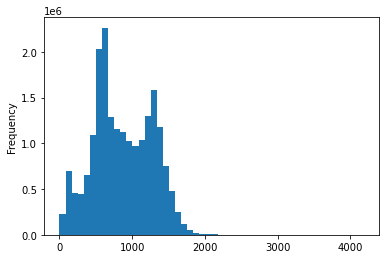

In [15]:
ss=summary.copy()
ss['avg_seconds']=ss['avg_interval'].dt.total_seconds()
ss['avg_seconds'].plot.hist(bins=50)

In [16]:
len(summary)

20228414

In [17]:
summary.to_pickle('26M_watch_interval_average.pkl')

In [18]:
summary['avg_interval'].mean()

Timedelta('0 days 00:14:26.220234121')

In [19]:
summary['avg_interval'].std()

Timedelta('0 days 00:06:44.268733625')

In [20]:
avg_watchtime['avg_interval'].mean()

Timedelta('0 days 00:14:27.459276519')

In [21]:
summary['interval'].mean()

Timedelta('0 days 00:14:26.220234122')

In [22]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(avg_watchtime.head(1000))

,avg_interval,item
item,,
,0 days 00:04:55.485615401,
(18)寻找热心的红杉兄弟-08年5月16日 成都中医药大学.mp4,0 days 00:08:33.500000,(18)寻找热心的红杉兄弟-08年5月16日 成都中医药大学.mp4
(19)寻找勇救学生的王老师-08年5月12日 成都成师附小.mp4,0 days 00:00:13,(19)寻找勇救学生的王老师-08年5月12日 成都成师附小.mp4
(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,0 days 00:16:26,(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4
(22)寻找最美志愿者-08年5月16日 汶川县映秀镇.mp4,0 days 00:00:28,(22)寻找最美志愿者-08年5月16日 汶川县映秀镇.mp4
(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4,0 days 00:00:23,(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4
(Michael.Jackson(Scream).mp4,0 days 00:01:33.500000,(Michael.Jackson(Scream).mp4
00100512中道齐家三部曲之二家庭教育(1).mp4,0 days 00:08:04.800000,00100512中道齐家三部曲之二家庭教育(1).mp4
00100512中道齐家三部曲之二家庭教育(10).mp4,0 days 00:25:54.500000,00100512中道齐家三部曲之二家庭教育(10).mp4
